In [1]:
import pickle as pkl

In [2]:
file = open('./results_deepsvg_format/Curve_ori_dataset/enc_by_name.pkl', 'rb')
enc_by_name = pkl.load(file)
file.close()

In [3]:
import os
os.chdir("../deepsvg_own_data")
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *
from deepsvg.svglib.geom import Bbox
import numpy as np

In [4]:
enc_keys = list(enc_by_name.keys())
import numpy as np
def Euclidean_Distance(x, y):
    return np.linalg.norm( x - y )
def Cosine_Distance(x,y):
    return 1 - np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [5]:
def get_k_max(array, k):
    _k_sort = np.argpartition(array, -k)[-k:]  # 最大的k个数据的下标
    return array[_k_sort], _k_sort


def get_k_min(array, k):
    _k_sort = np.argpartition(array, k)[:k]  # 最小的k个数据的下标
    return array[_k_sort], _k_sort


In [6]:
sim_scores = np.zeros((len(enc_keys),len(enc_keys)))
for i in range(0, len(sim_scores)):
    source = enc_by_name[enc_keys[i]]
    for j in range(i,len(sim_scores)):
        score = Euclidean_Distance(source, enc_by_name[enc_keys[j]])
        sim_scores[i][j] = score
        sim_scores[j][i] = score
        

In [7]:
sim_scores = np.load('../SVG_Informer_new_feature/sim_scores.npy')

In [ ]:
np.save("../SVG_Informer_new_feature/sim_scores.npy",sim_scores)

In [8]:
svg_path = '/home/defuc/sensei-fs-symlink/users/defuc/workspace/SVG_Informer_new_feature/results_deepsvg_format_plot/Lable_categ_informer_Fonts_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0debug/label/'

In [9]:
svg = SVG.load_svg(svg_path + '/' + enc_keys[1]+'.svg')

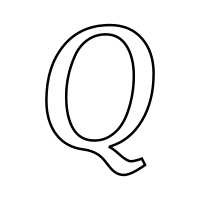

In [10]:
svg.draw()

In [12]:
from deepsvg.svglib.utils import make_grid
svg_list = []
for i in range(len(sim_svg)):
    svg = SVG.load_svg(svg_path + '/' + sim_svg[i]+'.svg')
    svg_list.append(svg)

make_grid(svg_list, num_cols=len(sim_svg), grid_width=20).draw()
#.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')



NameError: name 'sim_svg' is not defined

In [25]:
sim_svg

array(['Gantari-Italic[wght]_056_eight_612_1000-8-8',
       'EncodeSansCondensed-SemiBold_056_eight_1137_2000-8-8',
       'CormorantSC-SemiBold_056_eight_571_1000-8-8',
       'Sedan-Regular_056_eight_524_1000-8-8',
       'DarkerGrotesque-Medium_056_eight_540_1000-8-8',
       'ShipporiMincho-SemiBold_056_eight_614_1000-8-8',
       'CormorantSC-Medium_056_eight_571_1000-8-8',
       'Maitree-Medium_056_eight_632_1000-8-8',
       'Sansation-LightItalic_056_eight_1260_2048-8-8',
       'ComicNeue-Light_056_eight_514_1000-8-8'], dtype='<U62')

In [ ]:
value,index = get_k_min(sim_scores[3], 10)
sim_svg = np.array(enc_keys)[index.astype(int)]
sim_svg

In [ ]:
from deepsvg.svglib.utils import make_grid
svg_list = []
for i in range(len(sim_svg)):
    svg = SVG.load_svg(svg_path + '/' + sim_svg[i]+'.svg')
    svg_list.append(svg)

make_grid(svg_list, num_cols=len(sim_svg), grid_width=20).draw()
#.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')


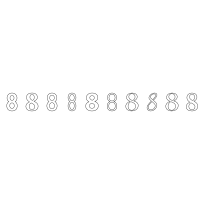

In [22]:
value,index = get_k_min(sim_scores[4], 10)
sim_svg = np.array(enc_keys)[index.astype(int)]
svg_list = []
for i in range(len(sim_svg)):
    svg = SVG.load_svg(svg_path + '/' + sim_svg[i]+'.svg')
    svg_list.append(svg)

make_grid(svg_list, num_cols=len(sim_svg), grid_width=20).draw()
#.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')

In [13]:
def retrival_m(sim_scorei, key):
    value,index = get_k_min(sim_scorei, 10)
    position_idex = np.argsort(value)
    index = index[position_idex]
    value = value[position_idex]
    print(value)
    sim_svg = np.array(enc_keys)[index.astype(int)]
    svg_list = []
    svg = SVG.load_svg(svg_path + '/' + key+'.svg')
    svg_list.append(svg)
    for i in range(len(sim_svg)):
        svg = SVG.load_svg(svg_path + '/' + sim_svg[i]+'.svg')
        svg_list.append(svg)

    make_grid(svg_list, num_cols=len(sim_svg)+1, grid_width=20).draw()
    #.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')

In [19]:
enc_keys[5]

'BlakaInk-Regular_079_O_441_1000-24-O'

In [36]:

value,index = get_k_min(sim_scores[5], 10)
position_idex = np.argsort(value)
index = index[position_idex]
value = value[position_idex]
print(index)
sim_svg = np.array(enc_keys)[index.astype(int)]
for i in range(len(sim_svg)):
    print(sim_svg[i])

[    5 23186 20571 19905 14299 18350 27402  7008 12050 19835]
DoHyeon-Regular_048_zero_550_1000-0-0
Saira[wdth,wght]_048_zero_676_1000-0-0
Saira[wdth,wght]_079_O_726_1000-24-O
IBMPlexSans-Italic_048_zero_600_1000-0-0
GenBkBasI_048_zero_859_2048-0-0
KaiseiOpti-Medium_048_zero_590_1000-0-0
Marvel-Italic_048_zero_439_1000-0-0
Arvo-BoldItalic_079_O_1597_2048-24-O
Exo-Italic[wght]_079_O_678_1000-24-O
KaiseiTokumin-Medium_048_zero_590_1000-0-0


In [41]:
file = open('../SVG_Informer_new_feature/keys.pkl', 'wb')
pkl.dump( enc_keys,file )
file.close()


In [40]:
enc_keys[:10]

['Barlow-Thin_076_L_566_1000-21-L',
 'Poly-Italic_081_Q_671_1000-26-Q',
 'Syne[wght]_110_n_554_1000-49-n',
 'BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B',
 'EkMukta-Bold_056_eight_520_1000-8-8',
 'DoHyeon-Regular_048_zero_550_1000-0-0',
 'Teko-Bold_119_w_679_1000-58-w',
 'Suwannaphum-Thin_116_t_719_2048-55-t',
 'AsapVFBeta_107_k_521_1000-46-k',
 'VesperLibre-Regular_083_S_1060_2048-28-S']

In [16]:
! pwd

/sensei-fs/users/defuc/workspace/deepsvg_own_data


Barlow-Thin_076_L_566_1000-21-L
[ 0.          7.09703588  7.54363728 11.14331818 15.98713684 32.19104385
 33.88910294 34.26263428 34.43981934 36.03222656]


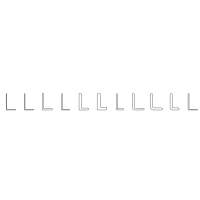

Poly-Italic_081_Q_671_1000-26-Q
[ 0.         26.0820446  28.84436607 29.55558205 30.32089043 30.68787384
 30.72387695 31.48862648 32.07305145 32.28495789]


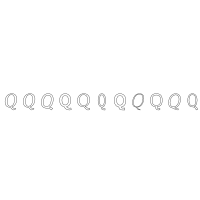

Syne[wght]_110_n_554_1000-49-n
[ 0.         22.88104248 22.902668   22.98998642 23.92759705 24.32971573
 26.10439301 26.39048386 27.76927567 27.97653389]


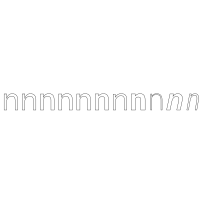

BioRhymeExpanded-ExtraLight_066_B_1269_1000-11-B
[ 0.         23.65202522 45.41873169 49.99031067 50.35575867 52.09114456
 52.96541214 53.86318588 54.20205688 54.3946991 ]


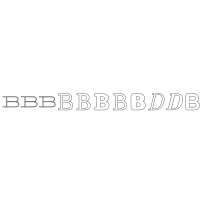

EkMukta-Bold_056_eight_520_1000-8-8
[ 0.         24.16432571 26.07149506 27.87261963 29.36138535 34.74194717
 35.42882919 35.79471207 37.69273758 38.2767067 ]


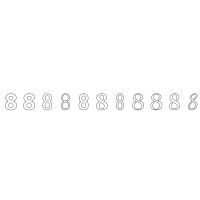

DoHyeon-Regular_048_zero_550_1000-0-0
[ 0.         36.47283173 37.02092361 40.53919983 42.1711235  42.45553207
 42.51266861 42.55889893 42.65066147 42.78646088]


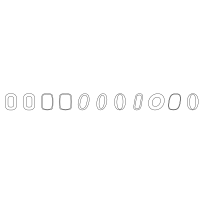

Teko-Bold_119_w_679_1000-58-w
[ 0.         11.54203129 11.67128181 12.50430107 13.45668221 13.71434784
 14.18608856 15.42948818 17.06859207 17.39915657]


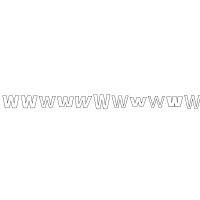

Suwannaphum-Thin_116_t_719_2048-55-t
[ 0.          6.4644413   7.34964323  9.47993755 10.18696499 10.79441452
 11.17383289 11.28178883 11.45747852 11.48601246]


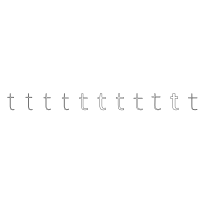

AsapVFBeta_107_k_521_1000-46-k
[ 0.         34.04578781 35.36052704 36.92050934 39.39701462 42.90719986
 43.91189575 46.51224136 48.21896362 48.25899887]


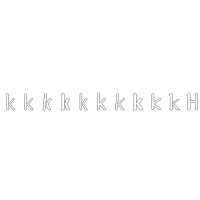

VesperLibre-Regular_083_S_1060_2048-28-S
[ 0.         19.23065948 30.5943737  31.03441811 33.73960876 36.30639648
 37.19154739 37.24121475 37.36959839 37.61878586]


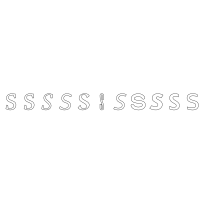

TiroTelugu-Italic_118_v_491_1000-57-v
[ 0.          5.78977585  6.35404444 35.65452957 36.08715439 37.28158569
 37.42755508 39.27138901 40.12825775 40.45158768]


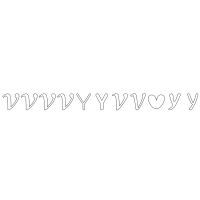

HachiMaruPop-Regular_122_z_695_1000-61-z
[ 0.         39.16617966 44.1558342  44.68127441 45.46647263 47.1176796
 47.53728867 47.54600906 47.55500412 47.58731079]


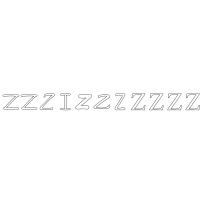

Tillana-ExtraBold_053_five_564_1000-5-5
[ 0.         43.3681221  44.35245514 44.76119232 45.29076767 45.47494507
 45.65842819 45.79725266 46.15176392 46.276577  ]


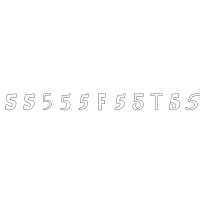

GothicA1-ExtraLight_077_M_876_1024-22-M
[ 0.         31.82099152 33.27212524 38.31042099 38.62338638 39.40415573
 40.89020157 42.93412399 43.04109573 43.12722397]


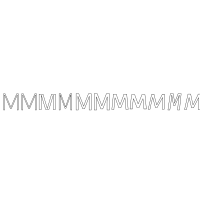

BaiJamjuree-Italic_110_n_572_1000-49-n
[ 0.         20.11952209 24.14457321 25.18075943 26.03112602 26.19440651
 27.56765175 28.41648865 29.70324135 30.03394318]


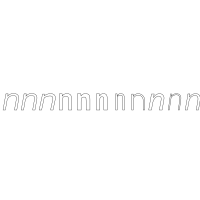

Chivo-Italic_098_b_582_1000-37-b
[ 0.         15.41636372 16.08912468 20.12730217 20.59334946 22.41911507
 22.58794975 26.14788055 26.86514091 27.16704559]


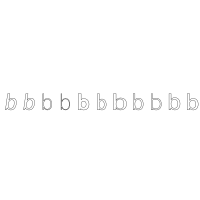

BeVietnamPro-Thin_108_l_215_1000-47-l
[0.         7.55460024 7.87187815 7.87718248 7.90540171 8.0983448
 8.23660088 8.2480917  8.35980606 8.39772892]


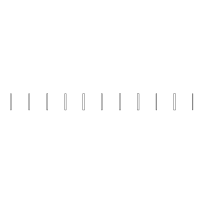

IBMPlexSansHebrew-Bold_122_z_518_1000-61-z
[0.         4.53015947 5.08638954 5.35714054 5.48436499 5.53524828
 5.92131138 6.02688122 6.08308029 6.50711298]


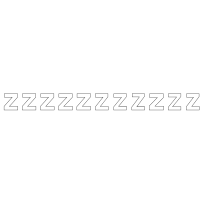

WindSong-Medium_057_nine_420_1000-9-9
[ 0.         39.22844696 51.19945908 53.09361267 53.62294769 55.67702484
 55.79494476 56.10346222 56.67552185 56.92708206]


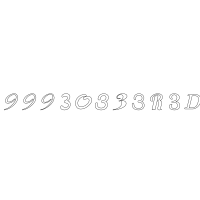

ABeeZee-Italic_088_X_621_1000-33-X
[ 0.          7.12013245  9.07934761 10.11759472 10.14267826 11.24593925
 11.82573414 12.86004829 13.29863548 13.48402691]


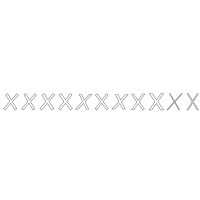

Gaegu-Regular_099_c_427_1000-38-c
[ 0.         29.13966751 30.47109604 35.05319595 35.85813904 36.633358
 36.96327972 37.35561371 38.12339401 38.3438797 ]


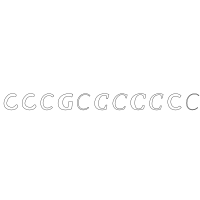

IstokWeb-Italic_086_V_1338_2048-31-V
[ 0.         35.41656876 42.37541199 47.05160904 47.32172394 48.16749191
 48.76521301 49.26107788 50.12005234 50.24654007]


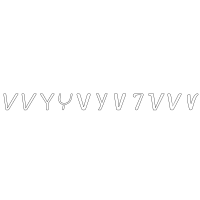

Teko-Bold_106_j_250_1000-45-j
[ 0.         22.3889637  23.56137276 26.39077377 26.89502716 27.1931839
 27.77734375 30.3992939  31.02013779 31.52156639]


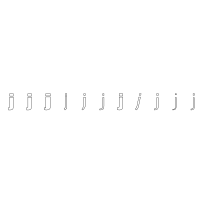

Rosario-Italic[wght]_116_t_287_1000-55-t
[ 0.         34.80527115 34.83183289 39.77759933 39.96084213 40.15303421
 40.19430923 41.60695267 41.99483109 42.45478058]


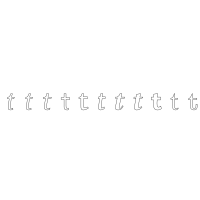

Philosopher-Bold_108_l_258_1000-47-l
[ 0.         29.51217461 30.16443825 31.34709549 31.60920143 32.19669342
 33.34261703 33.51620483 33.55980682 33.65221786]


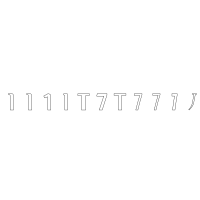

Pridi-Regular_110_n_603_1000-49-n
[ 0.         35.55067825 45.88975525 48.83415604 49.51181412 50.77265167
 51.17070389 51.61854553 51.65999222 51.93035126]


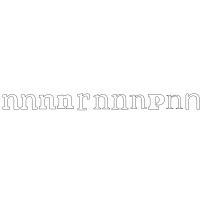

Slabo13px-Regular_074_J_240_780-19-J
[ 0.         23.48288345 24.29235649 25.66992569 26.22083855 27.35768318
 27.98896408 28.79968071 30.11735725 30.13064766]


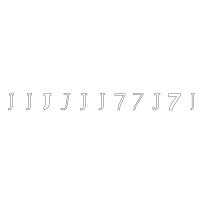

Geostar-Regular_053_five_940_1000-5-5
[ 0.         63.23282623 63.61738205 64.19864655 64.56798553 64.60597992
 64.73695374 64.82943726 65.40467834 65.49821472]


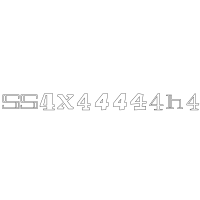

Fruktur-Regular_116_t_827_2048-55-t
[ 0.         40.90284729 41.58117676 43.02075195 43.50661469 43.72225571
 43.91424179 43.95906448 43.98910141 44.54348373]


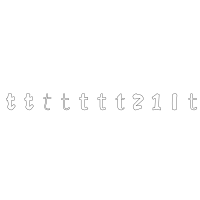

ArimaMadurai-ExtraBold_048_zero_635_1000-0-0
[0.         7.86600637 8.22597694 8.27864838 8.5993948  8.78097725
 8.79930878 8.80437851 8.8322401  8.89774323]


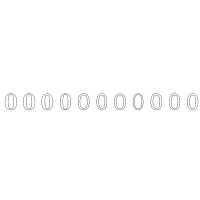

Sarabun-MediumItalic_110_n_554_1000-49-n
[ 0.         16.45450592 25.84780121 26.6916523  26.73157883 27.45659447
 27.46117783 27.98859978 28.80223465 30.27404404]


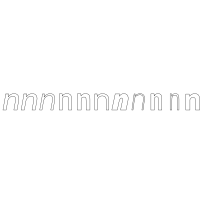

Mada-Bold_112_p_573_1000-51-p
[ 0.         30.52670097 30.55657005 30.59179306 30.72232628 30.8091011
 30.97349167 31.5909481  31.71405602 32.27173996]


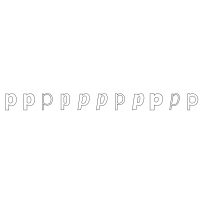

Karantina-Light_112_p_261_1000-51-p
[ 0.         42.91761398 43.25688171 43.48962021 44.40738678 45.28422165
 45.52842331 45.65333557 45.88635635 46.00246811]


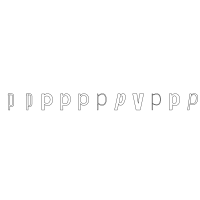

Inconsolata-ExtraExpandedSemiBold_065_A_750_1000-10-A
[ 0.          8.77251148  8.95005989  9.30815506  9.71054459 10.1835556
 10.51497746 10.56720352 10.95976448 11.01095963]


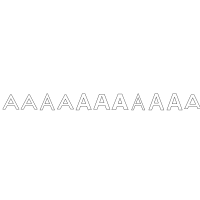

Cantarell-Oblique_116_t_763_2048-55-t
[ 0.         15.12924767 15.67758942 15.68691826 15.90349293 16.30757904
 16.44846535 16.81316757 16.86687851 16.98703384]


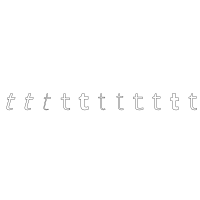

ChangaOne-Italic_070_F_470_1000-15-F
[ 0.          8.52042007  9.71368027  9.81811237  9.89435196 10.20009136
 10.24148083 10.37322903 11.36840343 11.41726494]


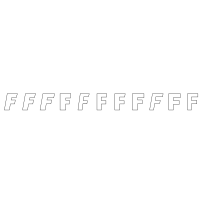

UnifrakturMaguntia-Book_057_nine_930_2048-9-9
[ 0.         28.81221008 29.67827606 32.30789185 32.74606705 33.38021088
 33.63401413 33.97277832 34.26332092 34.39395905]


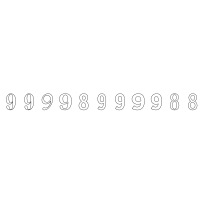

AlegreyaSansSC-ThinItalic_100_d_543_1000-39-d
[ 0.         16.48629951 31.87364578 33.86394119 35.94042969 36.19025421
 36.4052124  36.48851776 36.48913574 39.2204361 ]


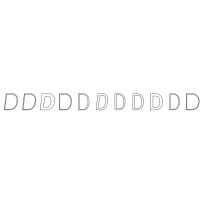

Manjari-Bold_097_a_1276_2048-36-a
[ 0.         44.84712982 47.21712875 49.16798019 49.20973206 49.73632812
 49.85394287 50.69152451 50.69839478 51.02100754]


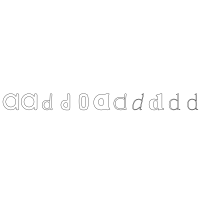

Trirong-SemiBoldItalic_057_nine_591_1000-9-9
[ 0.         22.22424316 23.96814156 24.93212509 26.276968   27.50901604
 27.763834   28.22752953 28.28713799 28.50113297]


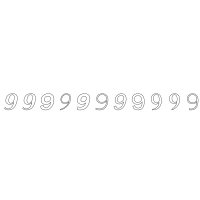

Snippet_099_c_435_1000-38-c
[ 0.         14.73565865 15.1334343  16.96045494 17.10544395 17.13297844
 17.65067673 17.99432945 18.08624268 18.30344009]


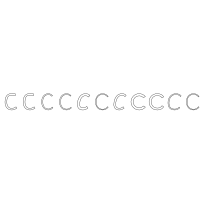

HindMadurai-Light_114_r_314_1000-53-r
[ 0.          6.51460075  7.99611807  8.14985275 10.47078323 11.61534405
 11.69660187 11.85908794 13.33740902 15.29795456]


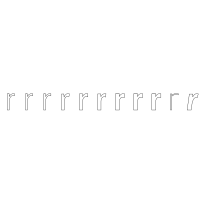

In [15]:
for i in range(0, len(sim_scores)):
    print(enc_keys[i])
    retrival_m(sim_scores[i],enc_keys[i])
    if i > 40:
        break

In [14]:
value,index = get_k_min(sim_score[10], 10)
sim_svg = np.array(enc_keys)[index.astype(int)]
svg_list = []
for i in range(len(sim_svg)):
    svg = SVG.load_svg(svg_path + '/' + sim_svg[i]+'.svg')
    svg_list.append(svg)

make_grid(svg_list, num_cols=len(sim_svg), grid_width=20).draw()
#.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')

NameError: name 'sim_score' is not defined

In [36]:
sim_svg

array(['Mali-SemiBold_109_m_795_1000-48-m',
       'Revalia-Regular_109_m_2024_2048-48-m',
       'LeckerliOne-Regular_078_N_691_1000-23-N',
       'Palanquin-SemiBold_109_m_880_1000-48-m',
       'YaldeviColombo-SemiBold_109_m_786_1024-48-m',
       'Mallanna-Regular_077_M_747_870-22-M',
       'AsapCondensed-SemiBoldItalic_110_n_482_1000-49-n',
       'PalanquinDark-Medium_109_m_901_1000-48-m',
       'IstokWeb-Bold_110_n_1200_2048-49-n',
       'Asap[wght]_110_n_557_1000-49-n'], dtype='<U62')

In [40]:
for i in range(len(enc_keys)):
    if enc_keys[i] == 'Devonshire-Regular_054_six_410_1000-6-6':
        print(i)
        break

2


In [42]:
enc_keys[:10]

['CormorantUpright-SemiBold_121_y_478_1000-60-y',
 'ShipporiMincho-SemiBold_056_eight_614_1000-8-8',
 'Devonshire-Regular_054_six_410_1000-6-6',
 'BarlowSemiCondensed-Bold_057_nine_482_1000-9-9',
 'IBMPlexSerif-Thin_105_i_266_1000-44-i',
 'BlakaInk-Regular_079_O_441_1000-24-O',
 'Merriweather-Regular_085_U_740_1000-30-U',
 'FrankRuhlLibre-Bold_089_Y_652_1000-34-Y',
 'Lato-BoldItalic_075_K_1283_2000-20-K',
 'MoonDance-Regular_085_U_672_1000-30-U']

In [43]:
'y'=='Y'

False

In [24]:
retrival_data_cls = {}
for key in enc_keys:
    if key[-1] not in retrival_data_cls:
        retrival_data_cls[key[-1]]=[]
    retrival_data_cls[key[-1]].append(key)
    

In [25]:
keys = list(retrival_data_cls.keys())
keys.sort()

In [26]:
for key in keys:
    print(key +'\t:\t' +str(len(retrival_data_cls[key])))

0	:	514
1	:	560
2	:	524
3	:	428
4	:	476
5	:	504
6	:	509
7	:	559
8	:	450
9	:	532
A	:	436
B	:	448
C	:	553
D	:	534
E	:	418
F	:	435
G	:	421
H	:	377
I	:	522
J	:	546
K	:	353
L	:	515
M	:	353
N	:	453
O	:	554
P	:	424
Q	:	453
R	:	359
S	:	484
T	:	505
U	:	520
V	:	517
W	:	351
X	:	360
Y	:	452
Z	:	506
a	:	396
b	:	427
c	:	575
d	:	451
e	:	488
f	:	432
g	:	303
h	:	403
i	:	540
j	:	501
k	:	380
l	:	546
m	:	315
n	:	470
o	:	545
p	:	405
q	:	482
r	:	522
s	:	469
t	:	486
u	:	485
v	:	530
w	:	401
x	:	447
y	:	446
z	:	514


In [ ]:
def retrival_no_plot(sim_scorei, label, top = 10):
    value,index = get_k_min(sim_scorei, top)
    sim_svg = np.array(enc_keys)[index.astype(int)]
    svg_list = 0
    for i in range(len(sim_svg)):
        if label == sim_svg[i][-1]:
            svg_list+=1 
    return svg_list
            
        
    #.save_svg(visualization_dir+"interpolation_results/"+key1+'+'+key2+'/all.svg')

In [ ]:
acc_num = 0
for i in range(0, len(sim_scores)):
    #print(enc_keys[i])
    num = retrival_no_plot(sim_scores[i], enc_keys[i][-1])
    acc_num += num

print('Acc:' + str(acc_num/(100*len(sim_scores))))
    

Acc:0.07241685144124169


In [29]:
print('Acc:' + str(acc_num/(20*len(sim_score))))

NameError: name 'sim_score' is not defined

In [31]:
acc_num = 0
for i in range(0, len(sim_scores)):
    #print(enc_keys[i])
    num = retrival_no_plot(sim_scores[i], enc_keys[i][-1], 5)
    acc_num += num

print('Acc:' + str(acc_num/(5*len(sim_scores))))

Acc:0.7885116407982261
